In [1]:
import numpy as np
import scipy as sp
from scipy.misc import comb
from matplotlib import pyplot as plt
%matplotlib inline

# Simulation

Sometimes we have a situation where we have a "good enough" statistical model of our situation where we use simulation to test our idea. For example if we are trying to figure out if a coin is "fair" then we know what the model should be. The model should be that each coin flip does not depend on the last (independent events) and that the probability of heads should be 50% or a probability $p = 0.5$.

I am basing this exposition from a great Jake Vanderplas talk at PyCon 2016, "Statistics for Hackers." His slide deck is available at [SlideDeck](https://speakerdeck.com/jakevdp/statistics-for-hackers) and his full talk is on [YouTube](https://youtu.be/Iq9DzN6mvYA). You should watch. 

Continuing with our exposition, if the probability of heads is $p$ then the probability of tails is $(1-p)$. This kind of situation is called a Bernoulli trial. Not only can we model coin flips but we could model the sex of a baby, the outcome of a medical test and many other situations. The key is that each time we run the test, the outcome should be independent of the results of previous tests. For example running medical tests for a genetic disease which is a result of random mutation on a large population, where each test is for a separate unrelated patient, might be modeled as a Bernoulli trial. It would not be valid if you run the test multiple times on the same patient. Another bad example might be if you were testing for cancer with patients in two neighborhoods, and one neighborhood has known carcinogens. If we have very good polling with a simple 2-candidate election, and $N$ people vote, we can use the polling to simulate the actual voting as a coin flip where the probability $p$ comes from the polling data.
    
If we have $N$ coin flips then the probability P of any particular sequence of $K$ "heads" and $N-K$ "tails" is just $p^K(1-p)^{N-K}$. On the other hand if we want to know the probability of exactly $K$ heads on $N$ coin flips, and we don't care what the sequence is then we need to count the number of ways this can happen. If we think about each flip that comes up heads as picking that number $\{ 1, \ldots ,N\}$, then a sequence with $K$ heads is the same as choosing $K$ element from a set of $N$ elements. There are $K$ choose $N$ ways of doing this:

$$\binom{N}{K} = \frac{N!}{K!(N-K)!}$$

Given this the binomial distribution, for the probability $Pr(X = K)$ of getting $K$ heads in $N$ flips is:

$$ Pr(X = K) = \binom{N}{K} p^K(1-p)^{N-K} $$

Now suppose we make 30 coin flips of a supposedly fair coin and we get 22 heads. We know that we should get around 15 heads so 22 seems a bit high. How sure are we that the coin is not fair and this is not just part of the random variation?

The way this is set up in statistics is that we turn around our hypothesis that the coin is not fair, to the "Null Hypothesis" that the coin *is* fair. We say we will reject the "Null Hypothesis" if the event has less than a $5\%$ chance of happening given that it is a fair coin. So in this case we could compute $Pr(X=22)$ with $p=0.5$.



In [2]:
num_flips = 30
num_heads = 22
p = 0.5
Pr22 = comb(30,22)*(p**22)*((1-p)**(30-22))
Pr22

0.0054509611800312996

Since 0.005 < 0.05 (5%) then we conclude it is not a fair coin. But sometimes it is much more complex than a simple distribution. For example if we had many binomial distributions together with different values of $p$ like in an election. Lets see how we would simulate in this heads and tails case even if we didn't know how to compute the binomial distribution.

First we should simulate a single coin flip

In [3]:
sides = ['H','T']


Lets build a function which can give us lots of flips in an array.

In [4]:
def flipper(num):
    return [np.random.choice(sides,p=[p,1-p]) for coin in range(num)]

In [5]:
flips = np.array(flipper(30))

It is easy to count flips using numpy.

In [6]:
(flips=='H').sum()

14

Let flip 30 coins 10000 times. That will be our simulation.

In [7]:
trials = 10000
num_coins = 30
simulation =[(np.array(flipper(num_coins))=='H').sum()
                for trial in range(trials)]
    

In [8]:
simulation

[16,
 17,
 15,
 11,
 13,
 17,
 15,
 9,
 16,
 14,
 15,
 12,
 12,
 18,
 21,
 20,
 16,
 13,
 14,
 15,
 12,
 18,
 19,
 16,
 17,
 10,
 17,
 16,
 19,
 15,
 9,
 12,
 14,
 18,
 12,
 22,
 15,
 14,
 14,
 13,
 11,
 13,
 11,
 15,
 15,
 17,
 17,
 8,
 18,
 15,
 12,
 17,
 13,
 18,
 12,
 18,
 15,
 16,
 17,
 15,
 18,
 16,
 15,
 17,
 14,
 16,
 7,
 17,
 18,
 17,
 13,
 11,
 13,
 19,
 17,
 10,
 16,
 18,
 12,
 20,
 13,
 16,
 15,
 17,
 14,
 17,
 12,
 18,
 10,
 15,
 12,
 14,
 14,
 18,
 13,
 17,
 17,
 15,
 16,
 12,
 16,
 14,
 12,
 10,
 17,
 14,
 13,
 16,
 13,
 13,
 17,
 11,
 13,
 19,
 12,
 15,
 19,
 15,
 17,
 11,
 17,
 14,
 19,
 16,
 16,
 17,
 18,
 12,
 13,
 17,
 16,
 17,
 17,
 19,
 13,
 11,
 13,
 13,
 16,
 15,
 16,
 18,
 17,
 17,
 16,
 17,
 15,
 16,
 20,
 22,
 11,
 17,
 16,
 20,
 15,
 16,
 16,
 12,
 18,
 19,
 13,
 20,
 19,
 19,
 15,
 15,
 16,
 11,
 17,
 15,
 13,
 19,
 18,
 12,
 17,
 16,
 14,
 19,
 16,
 16,
 17,
 16,
 10,
 15,
 18,
 15,
 13,
 14,
 20,
 13,
 15,
 13,
 14,
 18,
 16,
 16,
 13,
 10,
 16,
 12,
 13,

We set the histograms so the bins are *centered* on the possible values of the number of heads 0-30, and the bin limits are $\pm 0.5$  so that the bin width is one.

In [9]:
hist, bins = np.histogram(simulation,bins=np.arange(0,32)-0.5)
hist, bins                        

(array([   0,    0,    0,    0,    0,    3,    4,   26,   46,  148,  285,
         532,  774, 1140, 1376, 1439, 1289, 1122,  804,  510,  282,  137,
          58,   18,    3,    4,    0,    0,    0,    0,    0]),
 array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
         17.5,  18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,
         26.5,  27.5,  28.5,  29.5,  30.5]))

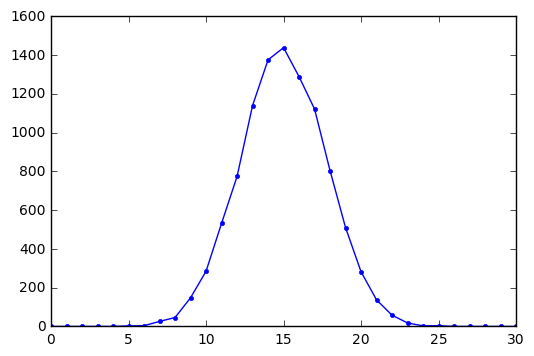

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(hist,'.-')

Lets see how often we get more than 12 heads (just to see).

In [11]:
observed_heads = 12
(np.array(simulation)>=12).sum()/trials

0.89559999999999995

Now lets see the probability of getting 22 heads.

In [12]:
(np.array(simulation)==22).sum()/trials

0.0057999999999999996

As we saw from the distribution this is so unlikely that we declare the coin to be (likely) to be unfair.